# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [75]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [76]:
#Importing all important library for linear Regression
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [77]:
# Reading the csv file
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [78]:
bike.shape

(730, 16)

In [79]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [80]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

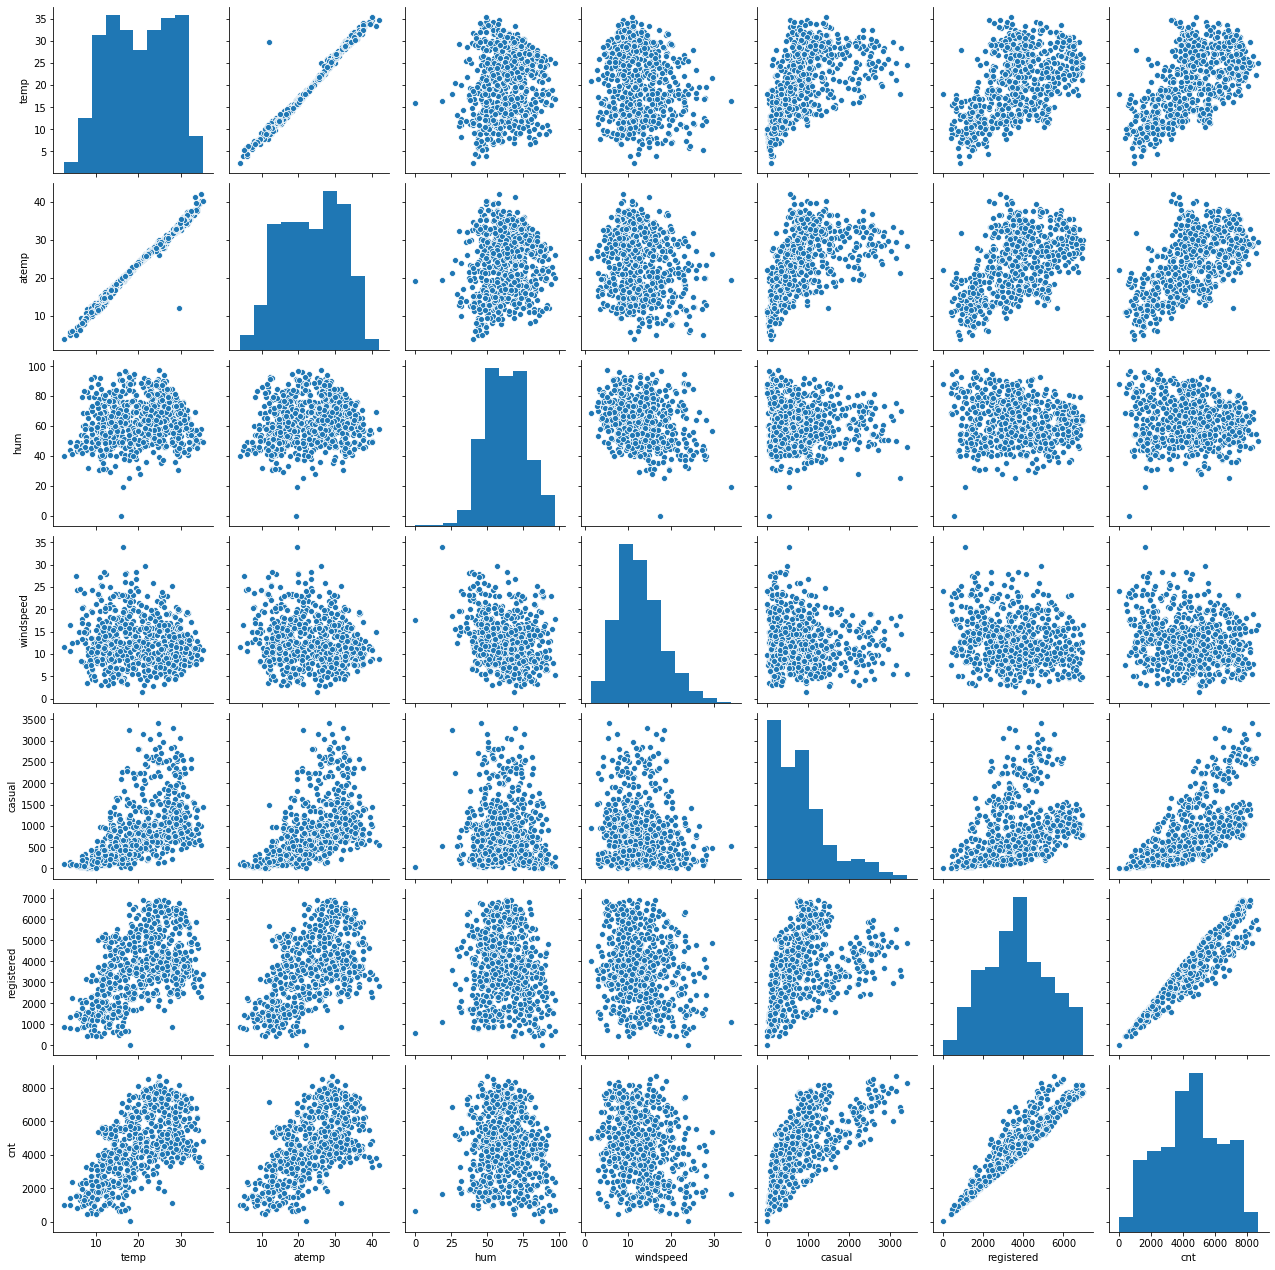

In [82]:
varlist =  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(bike[varlist])
plt.show()

From pair plots, we can conclude that
    1. registered, casual and cnt are highly correlated, that shows that both casual and registered are similar to cnt, hence they needs to be ignored in analysis as they directly relates to cnt.
    2. atemp and temp are highly correlated and hence we can drop one of them from the analysis as they act as redundant variables.


Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

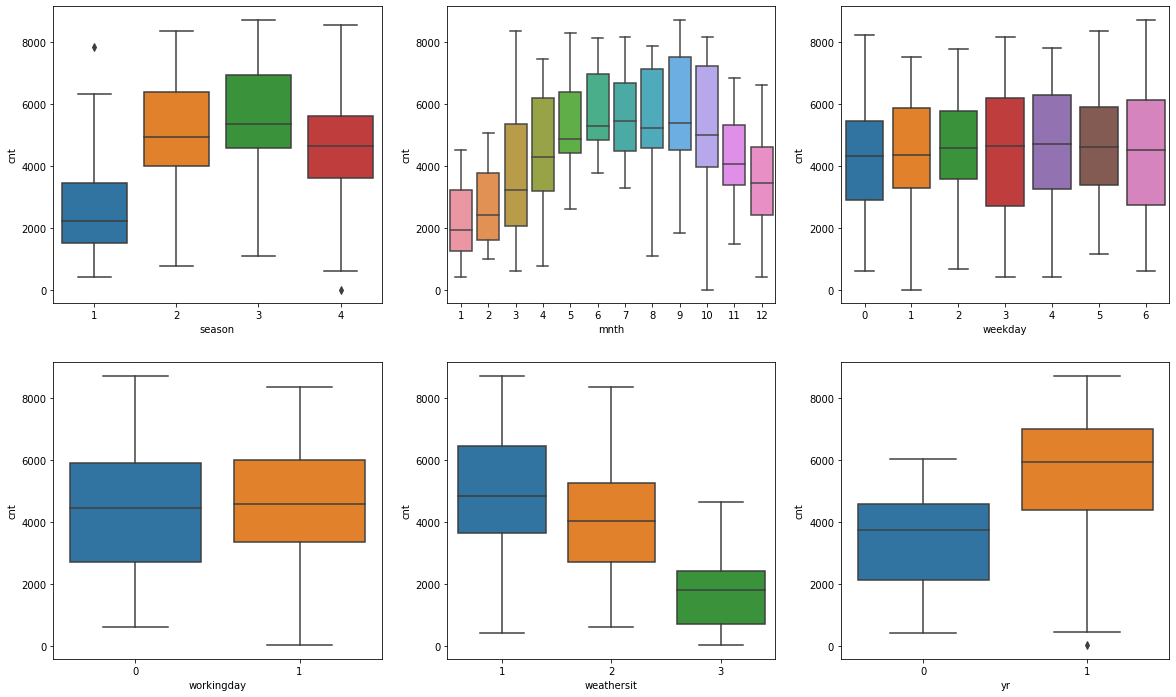

In [83]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

From the box plot, we can easily conclude that:
    1. Bike sharing count is more in season of summer and Fall compared to winter and spring.
    2. Bike sharing count is more in month of June to october than other months.
    3. Bike sharing count is more when weathersit is Clear, Few clouds, Partly cloudy, Partly cloudy.
    4. Bike sharing count is more in year 2019

## Step 3: Data Preparation



- We will first drop unnecessary columns for the analysis
- we will impute missing values
- Create dummy variables for categorical variables

- Drop 'instant' as it is record index and index is rando number with no relation with cnt.
- Drop 'atemp' as it is redundant to 'temp', hence dropping atemp.
- Drop 'casual' and 'registered' as they are more like target variable.
- Drop 'dteday' as we already have column for month and year and dteday is always 1st of every month.

In [84]:
# We will drop instant, atemp, casual and registered as they are unneccessary as discussed above 

bike.drop(['instant', 'atemp', 'dteday','casual', 'registered'], axis=1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Missing Value Analysis
Check any NULL values in data:

In [85]:
print(bike.isnull().any())

season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
hum           False
windspeed     False
cnt           False
dtype: bool


Since there are no missing values, No imputaton is required

## Dummy Variable
Covert all categorical columns to dummy variables, with the use of one hot encoding method

### We will be using one hot encoding for creating dummy variable

In [86]:
#We will converting season first to different season type

# Mapping the season function to its values
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [87]:
# Mapping the Month function to its values
bike['mnth'] = bike['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: ' November', 12: 'December'})
# Mappng weather sit column values
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,6,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,0,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,1,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,2,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,3,1,clear,9.305237,43.6957,12.522300,1600


In [88]:
# Mapping weekday categorical column values
bike['weekday'] = bike['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [89]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [90]:
# Creating dummy variables for column season
df_season = pd.get_dummies(bike['season'], drop_first = True)
df_season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [91]:
# Creating dummy variables for column mnth, weekday, weathersit
df_mnth = pd.get_dummies(bike['mnth'], drop_first = True)
df_weathersit = pd.get_dummies(bike['weathersit'], drop_first = True)
df_weekday = pd.get_dummies(bike['weekday'], drop_first = True)
print(df_mnth, df_weathersit, df_weekday)

     April  August  December  February  January  July  June  March  May  \
0        0       0         0         0        1     0     0      0    0   
1        0       0         0         0        1     0     0      0    0   
2        0       0         0         0        1     0     0      0    0   
3        0       0         0         0        1     0     0      0    0   
4        0       0         0         0        1     0     0      0    0   
..     ...     ...       ...       ...      ...   ...   ...    ...  ...   
725      0       0         1         0        0     0     0      0    0   
726      0       0         1         0        0     0     0      0    0   
727      0       0         1         0        0     0     0      0    0   
728      0       0         1         0        0     0     0      0    0   
729      0       0         1         0        0     0     0      0    0   

     October  September  
0          0          0  
1          0          0  
2          0         

In [92]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, df_season, df_mnth, df_weekday, df_weathersit], axis = 1)
bike.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'light snow', 'mist'],
      dtype='object')

In [93]:
bike.weathersit.value_counts()
# for weathersit only 2 columns got created mist and lightsnow 
#because there are only 3 values present in weather sit column no entry for Heavy rain present

clear         463
mist          246
light snow     21
Name: weathersit, dtype: int64

In [94]:
# Drop 'weathersit', 'mnth', 'weekday', 'season' as we have created the dummies for it

bike.drop(['weathersit', 'mnth', 'weekday', 'season'], axis = 1, inplace = True)

In [95]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

for regression is performing a train-test split.

In [96]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features

In [97]:
scaler = MinMaxScaler()

In [98]:
# Apply scaler() to all the columns except  'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [99]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [100]:
df_train.describe()
# all min values are 0 and max values are 1

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


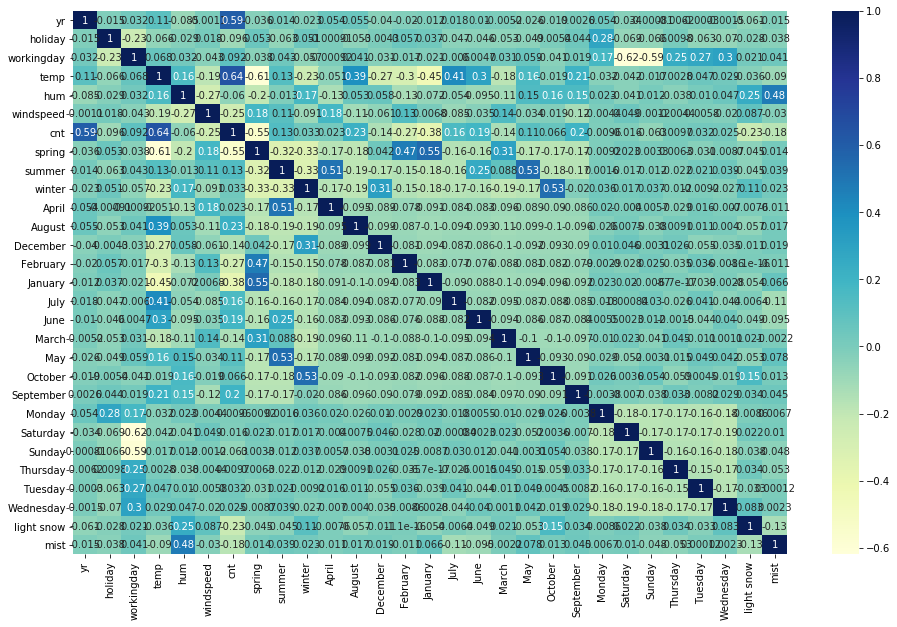

In [101]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))

sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [102]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

### RFE
Recursive feature elimination

In [103]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [104]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('April', True, 1),
 ('August', True, 1),
 ('December', False, 11),
 ('February', False, 5),
 ('January', False, 8),
 ('July', False, 9),
 ('June', True, 1),
 ('March', True, 1),
 ('May', True, 1),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 3),
 ('Sunday', False, 6),
 ('Thursday', False, 12),
 ('Tuesday', False, 14),
 ('Wednesday', False, 10),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [105]:
# Columns that we will be finaly considering in modelling
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'April', 'August', 'June', 'March', 'May', 'September', 'light snow',
       'mist'],
      dtype='object')

In [106]:
# columns that can be ignored for modelling
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'December', 'February', 'January', 'July',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [107]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [109]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [110]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.99e-188
Time:                        14:47:57   Log-Likelihood:                 511.20
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2867      0.034      8.537      0.0

In [111]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,70.64
6,spring,4.11
3,temp,3.34
7,winter,3.18
4,hum,1.93
8,April,1.83
9,August,1.77
12,May,1.68
10,June,1.59
15,mist,1.56


### Dropping the Variable and Updating the Model

As you can notice none of the variable have high VIF values as well as high p-values.
we cannot simply drop any of te variable but lets still try dropping August and see the impact on R squared value

In [112]:
X_train_new = X_train_rfe.drop(["August"], axis =1)

In [113]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.52e-187
Time:                        14:47:57   Log-Likelihood:                 507.16
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     495   BIC:                            -920.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2977      0.034      8.863      0.0

As you can notice none of the variable have high VIF values as well as high p-values.
we cannot simply drop any of the variable but lets still try dropping 'June' as P value for this column is not zero and see the impact on R squared value

In [114]:
X_train_new1 = X_train_new.drop(["June"], axis =1)

In [115]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new1)

In [116]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [117]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.25e-187
Time:                        14:47:57   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3065      0.033      9.203      0.0

In [118]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.21
6,spring,3.69
3,temp,3.24
7,winter,2.57
4,hum,1.92
13,mist,1.56
8,April,1.53
10,May,1.29
12,light snow,1.25
5,windspeed,1.21


As you can notice none of the variable have high VIF values as well as high p-values.
we cannot simply drop any of the variable but lets still try dropping 'April' as P value for this column is not zero and see the impact on R squared value

In [119]:
X_train_new2 = X_train_new1.drop(["April"], axis =1)

In [120]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)

lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.56e-187
Time:                        14:47:58   Log-Likelihood:                 502.45
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     497   BIC:                            -923.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3349      0.031     10.686      0.0

In [121]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.82
6,spring,2.73
3,temp,2.65
7,winter,1.96
4,hum,1.92
12,mist,1.56
11,light snow,1.25
9,May,1.19
5,windspeed,1.17
8,March,1.14


As you can notice none of the variable have high VIF values as well as high p-values.
we cannot simply drop any of the variable but lets still try dropping 'March' as P value for this column is not zero and see the impact on R squared value

In [122]:
X_train_new3 = X_train_new2.drop(["March"], axis =1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new3)

lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.35e-187
Time:                        14:47:58   Log-Likelihood:                 497.89
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3411      0.032     10.820      0.0

In [123]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.56
6,spring,2.70
3,temp,2.64
7,winter,1.93
4,hum,1.92
11,mist,1.56
10,light snow,1.24
8,May,1.18
5,windspeed,1.17
9,September,1.10


As you can notice none of the variable have high VIF values as well as high p-values.
we cannot simply drop any of the variable but lets still try dropping 'May' as P value for this column is not zero and see the impact on R squared value

In [124]:
X_train_new4 = X_train_new3.drop(["May"], axis =1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new4)

lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.65e-186
Time:                        14:47:58   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3438      0.032     10.810      0.0

In [125]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.52
3,temp,2.61
6,spring,2.53
4,hum,1.86
7,winter,1.77
10,mist,1.56
9,light snow,1.23
5,windspeed,1.17
8,September,1.07
1,yr,1.03


Finally we will drop constant value

In [126]:
X_train_new4 = X_train_new4.drop(['const'], axis=1)

In [127]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.66
2,temp,13.05
4,windspeed,3.97
5,spring,2.52
9,mist,2.23
6,winter,2.09
0,yr,2.05
8,light snow,1.20
7,September,1.16
1,holiday,1.04


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

### Normal distribution of error terms: 
One of the assumption in linear regression is that the error(residuals) follow a normal distribution. So lets see if it follow normal distribution

In [128]:
y_train_cnt = lm4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

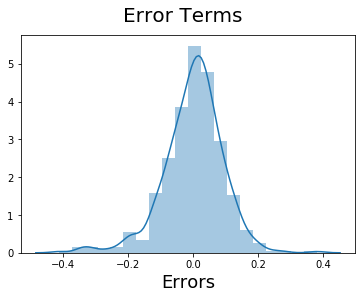

In [129]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [130]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [131]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
X_train_new4.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'September', 'light snow', 'mist'],
      dtype='object')

In [134]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [135]:
# Making predictions using the fourth model

y_pred = lm4.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

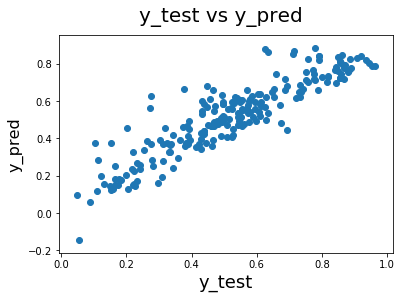

In [136]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

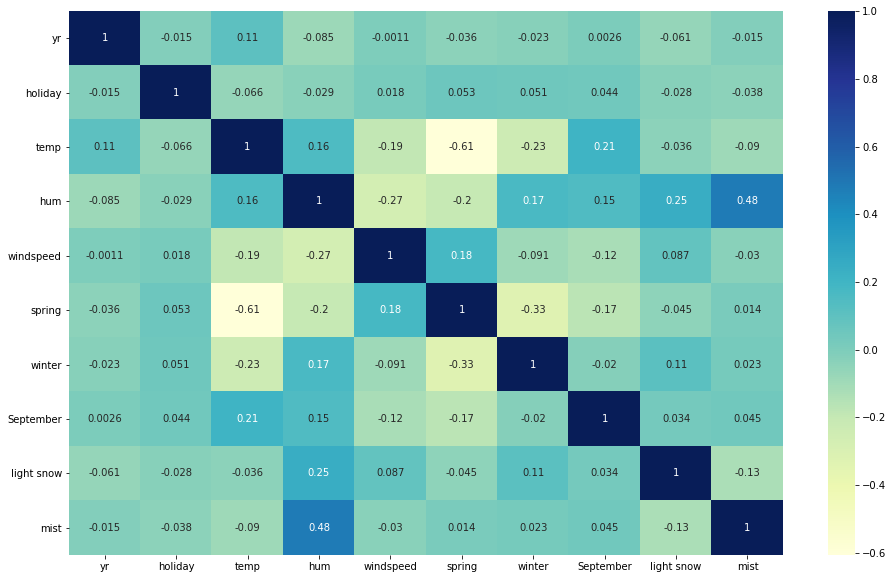

In [137]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))

sns.heatmap(X_train_new4.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see none of the columns have high correlation between each other.
This heatmap gives us the correlation coefficients of each feature with respect to one another which are in turn less than 0.4.Thus the features aren’t highly correlated with each other.

Why removing highly correlated features is important?
The interpretation of a regression coefficient is that it represents the mean change in the target for each unit change in an feature when you hold all of the other features constant. However, when features are correlated, changes in one feature in turn shifts another feature/features. The stronger the correlation, the more difficult it is to change one feature without changing another. It becomes difficult for the model to estimate the relationship between each feature and the target independently because the features tend to change in unison.

## Looking for patterns in the residuals

Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the features and the target) is the same across all values of the independent variables. A scatter plot of residual values vs predicted values is a goodway to check for homoscedasticity

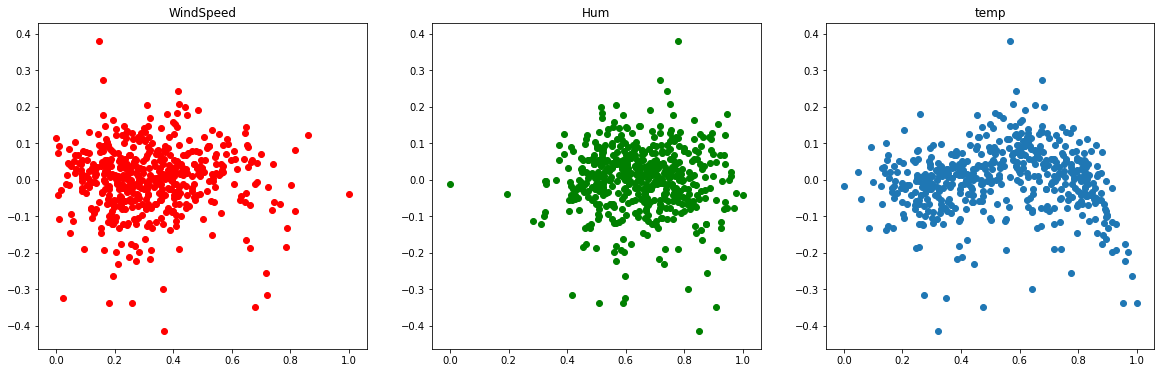

In [138]:
res = (y_train - y_train_cnt)
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.title('WindSpeed')
plt.scatter(X_train_new4.windspeed, res, color = 'red')
plt.subplot(1, 3, 2)
plt.title('Hum')
plt.scatter(X_train_new4.hum, res, color = 'green')
plt.subplot(1, 3, 3)
plt.title('temp')
plt.scatter(X_train_new4.temp, res)
plt.show()


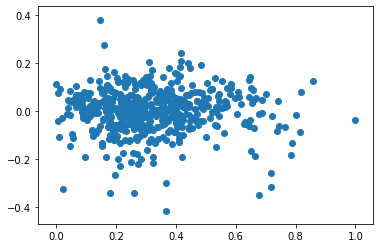

In [139]:
res = (y_train - y_train_cnt)
plt.scatter(X_train_new4.windspeed, res)
plt.show()

### Linear Relationship between the features and target: 
    According to this assumption there is linear relationship between the features and target. Linear regression captures only linear relationship. This can be validated by plotting a scatter plot between the features and the target. So below plot show that  there is a linear relationship between ‘cnt’ and independent variables 

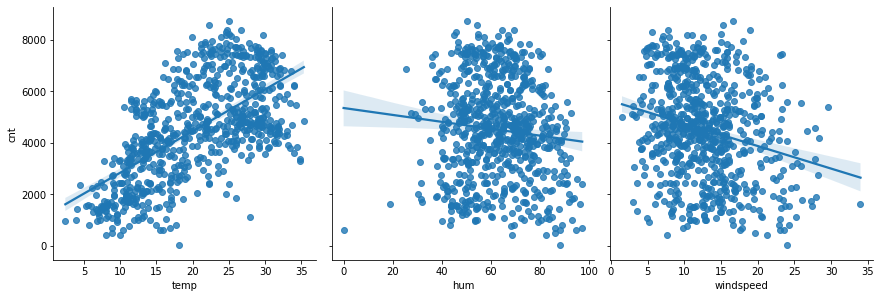

In [140]:
sns.pairplot(bike, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='reg',)
plt.show()

### Little or No autocorrelation in the residuals:
Autocorrelation can be tested with the help of Durbin-Watson test. From the above summary note that the value of Durbin-Watson test is 2.052 quite close to 2 as said before when the value of Durbin-Watson is equal to 2, r takes the value 0 from the equation 2*(1-r),which in turn tells us that the residuals are not correlated.

In [141]:
X_train_new4 = X_train_new3.drop(["May"], axis =1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new4)

lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.65e-186
Time:                        14:48:03   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3438      0.032     10.810      0.0

The final Linear equation is :

cnt = 0.2322 * Yr -0.0964 * holiday + 0.4305 * temp - 0.1399 * hum - 0.1620 * windspeed - 0.1132 * spring + 0.0565 * winter + 0.0740 * September - 0.2504 * light snow - 0.0559 * mist